<section id="project-objectives">
  <h2>Project Objective: Bike Sharing Demand Prediction</h2>

  <p>
    Build and evaluate machine learning models to predict the daily total bike rentals (<code>cnt</code>)
    using weather and calendar features, and derive actionable insights that explain demand patterns.
  </p>

  <h3>Specific Objectives</h3>
  <ul>
    <li><strong>Data Understanding (EDA):</strong> Explore seasonality, weekday/weekend effects, and weather impact on rentals.</li>
    <li><strong>Feature Preparation:</strong> Clean data and encode categorical variables (e.g., season, month, weather situation).</li>
    <li><strong>Baseline Model:</strong> Train a Linear Regression model as a simple benchmark.</li>
    <li><strong>Improved Model:</strong> Train a tree-based model (e.g., Random Forest) to capture non-linear relationships.</li>
    <li><strong>Model Comparison:</strong> Evaluate using R² and MSE; report gains over the baseline.</li>
    <li><strong>Interpretability:</strong> Present top features influencing demand (e.g., temperature, season, working day).</li>
    <li><strong>Visualization:</strong> Plot trends over time and predicted vs. actual rentals to validate model fit.</li>
    <li><strong>Reproducibility:</strong> Provide a clear, end-to-end notebook/code workflow.</li>
  </ul>

  <h3>Success Criteria</h3>
  <ul>
    <li>Baseline Linear Regression achieves a reasonable R² (≈ 0.5+ on hold-out set).</li>
    <li>Tree-based model improves R² substantially (typically ≈ 0.85–0.95 on the same split).</li>
    <li>Clear visual and textual insights that explain demand drivers.</li>
  </ul>

  <h3>Scope</h3>
  <ul>
    <li>Data: <code>day.csv</code> (daily aggregated bike rentals), with weather and calendar fields.</li>
    <li>Target variable: <code>cnt</code> (total daily rentals).</li>
    <li>Models covered: Linear Regression (baseline) and Random Forest (improved).</li>
  </ul>

  <h3>Expected Deliverables</h3>
  <ul>
    <li>EDA summary with key plots (distribution, correlations, seasonal patterns).</li>
    <li>Trained models with evaluation metrics (R², MSE).</li>
    <li>Feature importance chart for the Random Forest model.</li>
    <li>Concise report/markdown documenting methods, results, and insights.</li>
  </ul>
</section>


In [1]:
 import pandas as pd
 import numpy as np
 import matplotlib.pyplot as plt
 import seaborn as sns
 import os

In [2]:
from urllib.request import urlretrieve
import zipfile

# URL where the dataset (zip file) is stored online
zip_url = "https://samatrix-data.s3.ap-south-1.amazonaws.com/ML/Data-Bike-Share.zip"

# Name we will save the zip file as, in our computer
local_zip = "bike.zip"

# If the file is not already downloaded, then download it from the internet
if not os.path.exists(local_zip):
    urlretrieve(zip_url, local_zip)

# Open the downloaded zip file
with zipfile.ZipFile(local_zip) as z:
    # Inside the zip, there is a file called "day.csv"
    # We open it and read it into a pandas DataFrame called df
    with z.open("day.csv") as f:
        df = pd.read_csv(f)


In [3]:
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


<!-- Bike Sharing Dataset: Quick Reference (HTML for Colab) -->
<div style="font-family:system-ui,-apple-system,Segoe UI,Roboto,Arial,sans-serif; line-height:1.45; color:#1f2937; border:1px solid #e5e7eb; border-radius:14px; padding:18px; box-shadow:0 4px 14px rgba(0,0,0,.06);">
  <h2 style="margin:0 0 10px; font-size:20px;">Dataset Overview</h2>
  <p style="margin:6px 0;">
    <strong>Name:</strong> <code>df</code><br>
    <strong>Shape:</strong> <code>731 rows × 16 columns</code><br>
    <strong>Granularity:</strong> Daily records from <code>2011-01-01</code> to <code>2012-12-31</code><br>
    <strong>Use case:</strong> Bike rental demand modeling (time series / regression)
  </p>

  <hr style="border:none; border-top:1px solid #e5e7eb; margin:14px 0;">

  <h3 style="margin:0 0 8px; font-size:18px;">Columns & Meaning</h3>
  <table style="width:100%; border-collapse:collapse; font-size:14px;">
    <thead>
      <tr style="background:#f9fafb;">
        <th style="text-align:left; padding:8px; border-bottom:1px solid #e5e7eb;">Column</th>
        <th style="text-align:left; padding:8px; border-bottom:1px solid #e5e7eb;">Description</th>
      </tr>
    </thead>
    <tbody>
      <tr><td style="padding:8px; border-bottom:1px solid #f1f5f9;"><code>instant</code></td><td style="padding:8px; border-bottom:1px solid #f1f5f9;">Row ID / record index</td></tr>
      <tr><td style="padding:8px; border-bottom:1px solid #f1f5f9;"><code>dteday</code></td><td style="padding:8px; border-bottom:1px solid #f1f5f9;">Date (YYYY-MM-DD)</td></tr>
      <tr><td style="padding:8px; border-bottom:1px solid #f1f5f9;"><code>season</code></td><td style="padding:8px; border-bottom:1px solid #f1f5f9;">Season (1=Spring, 2=Summer, 3=Fall, 4=Winter)</td></tr>
      <tr><td style="padding:8px; border-bottom:1px solid #f1f5f9;"><code>yr</code></td><td style="padding:8px; border-bottom:1px solid #f1f5f9;">Year (0=2011, 1=2012)</td></tr>
      <tr><td style="padding:8px; border-bottom:1px solid #f1f5f9;"><code>mnth</code></td><td style="padding:8px; border-bottom:1px solid #f1f5f9;">Month (1–12)</td></tr>
      <tr><td style="padding:8px; border-bottom:1px solid #f1f5f9;"><code>holiday</code></td><td style="padding:8px; border-bottom:1px solid #f1f5f9;">Is holiday? (1=yes, 0=no)</td></tr>
      <tr><td style="padding:8px; border-bottom:1px solid #f1f5f9;"><code>weekday</code></td><td style="padding:8px; border-bottom:1px solid #f1f5f9;">Day of week (0=Sunday … 6=Saturday)</td></tr>
      <tr><td style="padding:8px; border-bottom:1px solid #f1f5f9;"><code>workingday</code></td><td style="padding:8px; border-bottom:1px solid #f1f5f9;">Is working day? (1=yes, 0=no)</td></tr>
      <tr>
        <td style="padding:8px; border-bottom:1px solid #f1f5f9;"><code>weathersit</code></td>
        <td style="padding:8px; border-bottom:1px solid #f1f5f9;">
          Weather: 1=Clear/Few clouds, 2=Mist/Cloudy, 3=Light snow/rain, 4=Heavy rain/ice
        </td>
      </tr>
      <tr><td style="padding:8px; border-bottom:1px solid #f1f5f9;"><code>temp</code></td><td style="padding:8px; border-bottom:1px solid #f1f5f9;">Normalized temperature (0–1)</td></tr>
      <tr><td style="padding:8px; border-bottom:1px solid #f1f5f9;"><code>atemp</code></td><td style="padding:8px; border-bottom:1px solid #f1f5f9;">Normalized “feels-like” temperature (0–1)</td></tr>
      <tr><td style="padding:8px; border-bottom:1px solid #f1f5f9;"><code>hum</code></td><td style="padding:8px; border-bottom:1px solid #f1f5f9;">Normalized humidity (0–1)</td></tr>
      <tr><td style="padding:8px; border-bottom:1px solid #f1f5f9;"><code>windspeed</code></td><td style="padding:8px; border-bottom:1px solid #f1f5f9;">Normalized wind speed (0–1)</td></tr>
      <tr><td style="padding:8px; border-bottom:1px solid #f1f5f9;"><code>casual</code></td><td style="padding:8px; border-bottom:1px solid #f1f5f9;">Count of casual (non-registered) users</td></tr>
      <tr><td style="padding:8px; border-bottom:1px solid #f1f5f9;"><code>registered</code></td><td style="padding:8px; border-bottom:1px solid #f1f5f9;">Count of registered users</td></tr>
      <tr><td style="padding:8px;"><code>cnt</code></td><td style="padding:8px;">Total rentals (casual + registered) — common target variable</td></tr>
    </tbody>
  </table>

  <div style="margin-top:12px; background:#f8fafc; border:1px dashed #cbd5e1; border-radius:10px; padding:10px;">
    <strong>Notes:</strong>
    <ul style="margin:6px 0 0 18px;">
      <li>Weather and climate features are scaled to 0–1; consider inverse-scaling only for interpretation.</li>
      <li><code>cnt</code> is typically modeled using regression or time-series approaches.</li>
      <li>Check for seasonality, trend, holidays, and weather effects.</li>
    </ul>
  </div>
</div>


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


<!-- Statistical Summary of Dataset -->
<div style="font-family:system-ui,-apple-system,Segoe UI,Roboto,Arial,sans-serif; line-height:1.5; color:#1f2937; border:1px solid #e5e7eb; border-radius:14px; padding:18px; box-shadow:0 4px 14px rgba(0,0,0,.06);">

  <h2 style="margin:0 0 12px; font-size:20px;">Statistical Summary (df.describe())</h2>

  <p>This summary provides descriptive statistics for all numerical features in the dataset:</p>

  <ul style="margin:8px 0 14px 20px;">
    <li><strong>count</strong>: Number of non-null observations (731 for all columns).</li>
    <li><strong>mean</strong>: Average value of each column.</li>
    <li><strong>std</strong>: Standard deviation (spread of values around the mean).</li>
    <li><strong>min</strong>: Minimum value.</li>
    <li><strong>25%</strong>: First quartile (25th percentile).</li>
    <li><strong>50%</strong>: Median (50th percentile).</li>
    <li><strong>75%</strong>: Third quartile (75th percentile).</li>
    <li><strong>max</strong>: Maximum value.</li>
  </ul>

  <h3 style="margin:0 0 8px; font-size:18px;">Key Observations</h3>
  <ul style="margin:6px 0 0 20px;">
    <li><code>cnt</code> (total rentals) ranges from <strong>22</strong> to <strong>8714</strong>, with a mean of about <strong>4504</strong>.</li>
    <li><code>casual</code> users range between <strong>2</strong> and <strong>3410</strong>, while <code>registered</code> users range from <strong>20</strong> to <strong>6946</strong>.</li>
    <li><code>temp</code> (normalized) varies between <strong>0.059</strong> and <strong>0.861</strong>, average ~0.49.</li>
    <li><code>hum</code> (humidity) varies between <strong>0.0</strong> and <strong>0.97</strong>, average ~0.63.</li>
    <li><code>windspeed</code> ranges between <strong>0.022</strong> and <strong>0.507</strong>.</li>
    <li><code>holiday</code> has very few 1s (mean ~0.028), meaning most days are non-holidays.</li>
  </ul>

  <div style="margin-top:12px; background:#f8fafc; border:1px dashed #cbd5e1; border-radius:10px; padding:10px;">
    <strong>Note:</strong> Normalized features (<code>temp</code>, <code>atemp</code>, <code>hum</code>, <code>windspeed</code>) are scaled between 0–1.
  </div>
</div>


In [6]:
df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
# df['dteday']=df['dteday'].astype('datetime64[ns]')

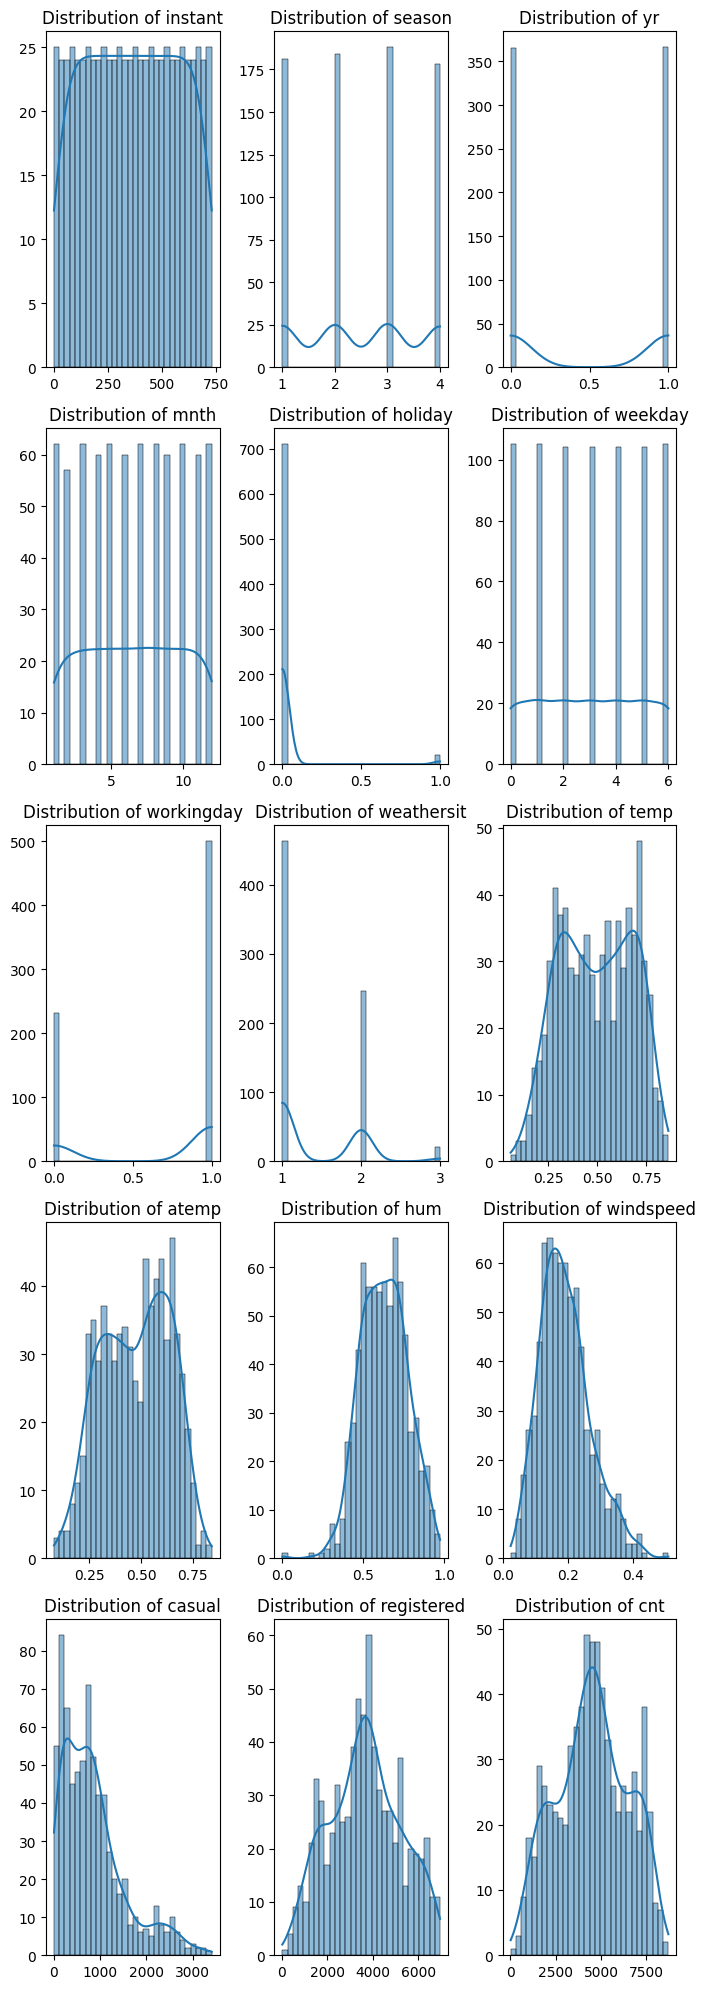

In [ ]:
num_cols = df.select_dtypes(include='number').columns

n_cols = 3
n_rows = (len(num_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(7, n_rows * 4))
for i, col in enumerate(num_cols):
    plt.subplot(n_rows, n_cols, i+1)
    sns.histplot(data=df, x=col, kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel('')
    plt.ylabel('')
plt.tight_layout()
plt.show()

## Distribution of Numerical Features

Below is an explanation of why each histogram appears as it does in the dataset:

- **instant**: Uniform distribution because it is just the row index (1–731).

- **season, yr, mnth, holiday, weekday, workingday, weathersit**:  
  These are categorical variables stored as numbers.  
  - Histograms show a few distinct spikes (bars), not continuous distributions.  
  - Example: `season` has values 1–4, `yr` has 0/1 only.

- **temp & atemp**: Both are normalized continuous variables (0–1 scale).  
  - Distributions appear roughly *bell-shaped*, since temperatures cluster around moderate values and fewer days are extremely hot or cold.

- **hum (humidity)**: Mostly concentrated around mid-to-high values (~0.5–0.8).  
  - The distribution is slightly skewed toward higher humidity days.

- **windspeed**: Right-skewed.  
  - Most days have low wind speed, so histogram has a tall bar near 0, with fewer cases at higher speeds.

- **casual**: Right-skewed.  
  - Many days have few casual users, while only a few days see very high rentals.  
  - Peaks are lower and spread out.

- **registered**: More normally distributed but slightly right-skewed.  
  - Registered users are the majority of rentals, clustering around mid-to-high values.

- **cnt (total rentals)**: Bell-shaped but slightly right-skewed.  
  - Most days fall in the middle range (~3000–6000 rentals), with fewer very low or very high rental counts.

---


/tmp/ipython-input-618372802.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="season", y="cnt", data=df, estimator=np.mean, palette="Set2")


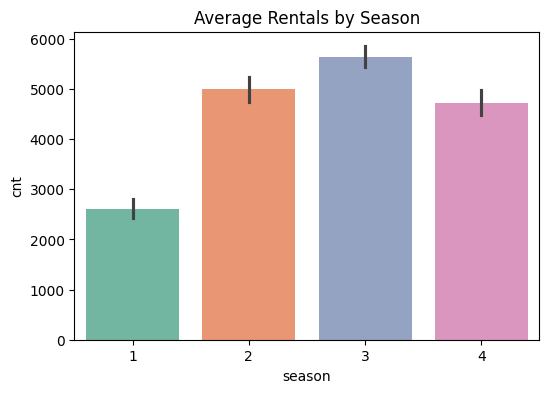

In [7]:
# Average rentals by season
plt.figure(figsize=(6,4))
sns.barplot(x="season", y="cnt", data=df, estimator=np.mean, palette="Set2")
plt.title("Average Rentals by Season")
plt.show()

## Average Rentals by Season

The bar chart shows how bike rentals vary across seasons:

- **Season 1 (Winter)**: Lowest average rentals (~2500). Cold weather reduces cycling.  
- **Season 2 (Spring)**: Rentals increase significantly (~5000). Milder weather encourages biking.  
- **Season 3 (Summer)**: Highest rentals (~5700). Warm and pleasant conditions maximize demand.  
- **Season 4 (Fall/Autumn)**: Rentals drop slightly (~4700), but remain higher than winter.

**Insight:**  
Bike rentals are **season-dependent**, peaking in **summer** and hitting the lowest point in **winter**. This pattern reflects the influence of weather conditions on outdoor bike usage.


/tmp/ipython-input-480373681.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="weekday", y="cnt", data=df, estimator=np.mean, palette="Set1")


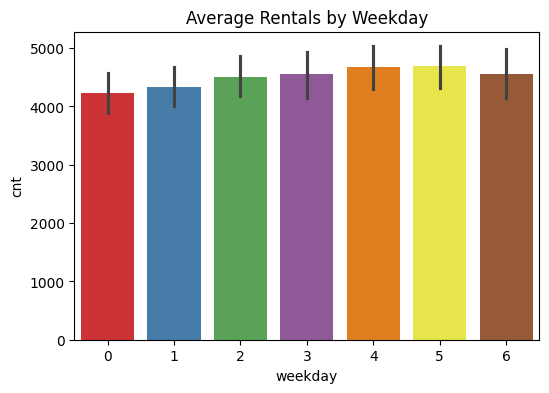

In [8]:
# Average rentals by weekday
plt.figure(figsize=(6,4))
sns.barplot(x="weekday", y="cnt", data=df, estimator=np.mean, palette="Set1")
plt.title("Average Rentals by Weekday")
plt.show()

## Average Rentals by Weekday

The bar chart displays how bike rentals vary across weekdays (0 = Sunday, 6 = Saturday):

- Rentals are **slightly lower on Sundays (0)** compared to weekdays.  
- From **Monday to Friday (1–5)**, rentals remain consistently higher (~4500–4700).  
- **Saturday (6)** also shows strong demand, slightly lower than peak weekdays but higher than Sunday.  

**Insight:**  
Bike rentals are **fairly stable throughout the week**, with **slight dips on Sundays**. This suggests bikes are used for both **commuting (weekdays)** and **leisure (weekends)**.


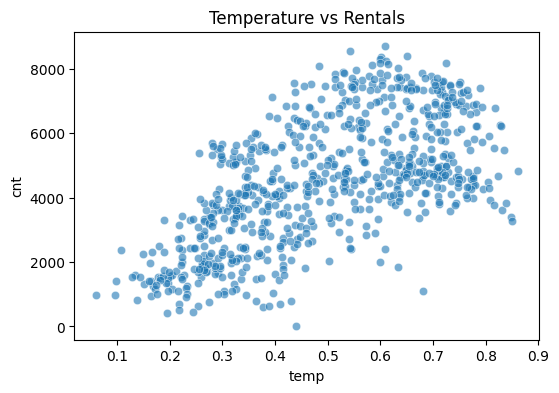

In [9]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="temp", y="cnt", data=df, alpha=0.6)
plt.title("Temperature vs Rentals")
plt.show()

## Temperature vs Rentals

The scatter plot shows the relationship between **temperature (normalized)** and **bike rentals (cnt):**

- There is a **clear positive correlation**: as temperature increases, the number of rentals also increases.  
- Rentals are **very low at colder temperatures (<0.2 normalized scale)**.  
- Rentals peak at **moderate to warm temperatures (0.5–0.7 normalized scale)**, where demand is the highest.  
- At extremely high temperatures (>0.75), rentals slightly drop, suggesting very hot weather discourages bike usage.  

**Insight:**  
Bike rentals are most popular in **pleasant, warm weather**, supporting the idea that **temperature strongly drives user demand**.


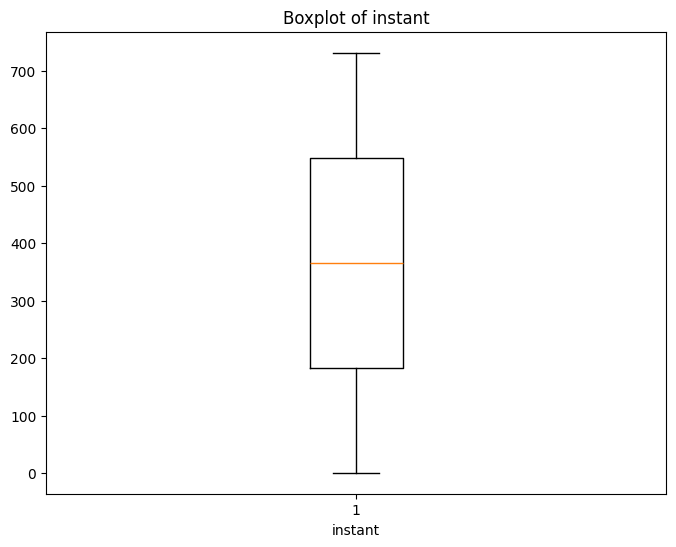

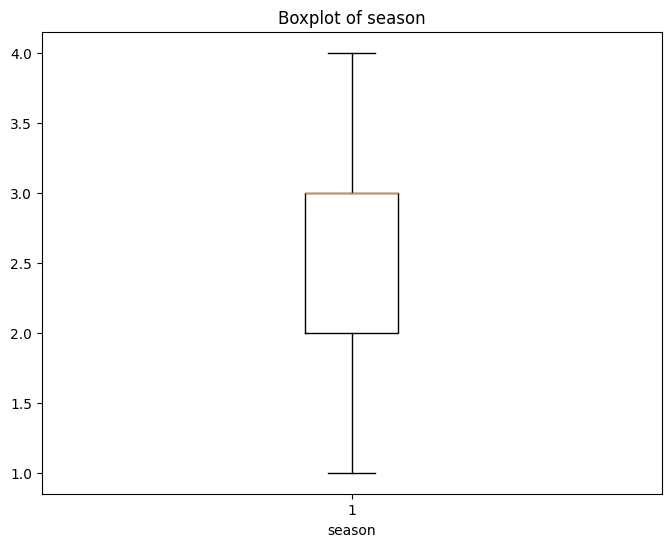

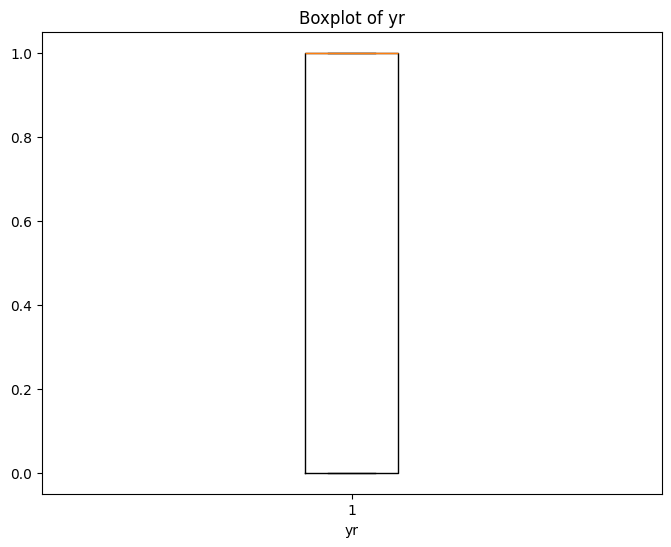

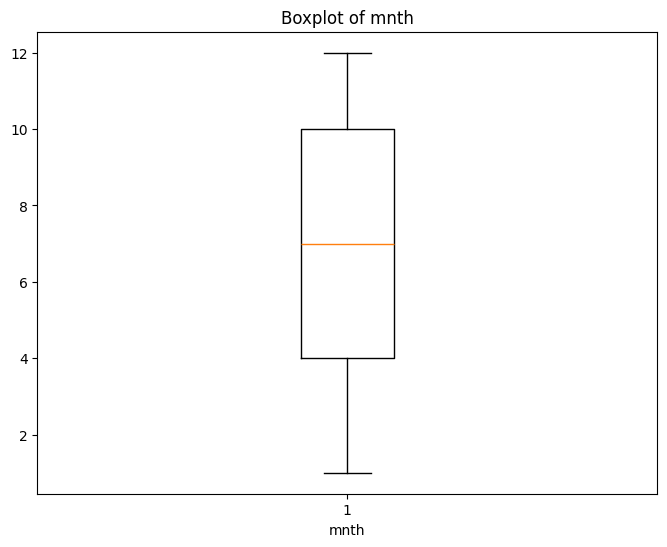

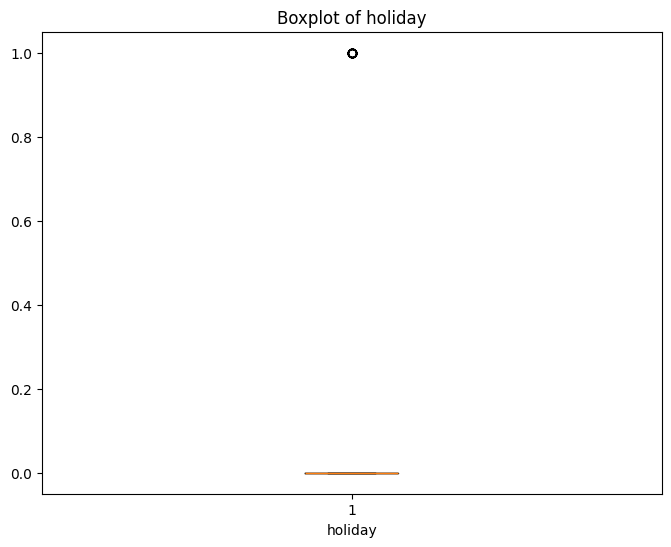

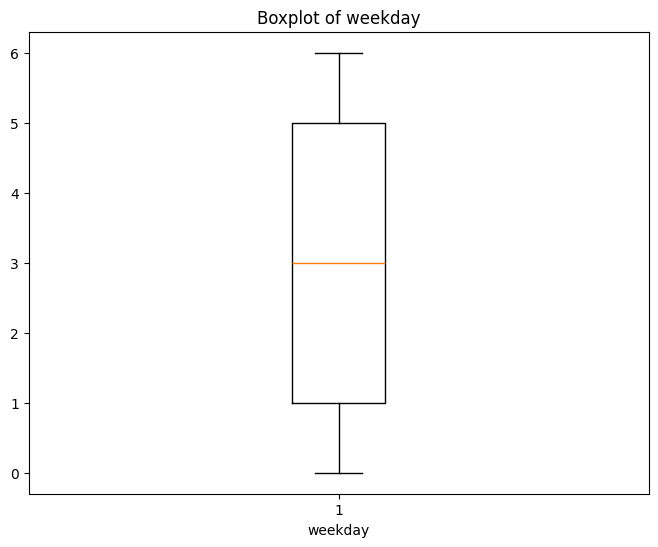

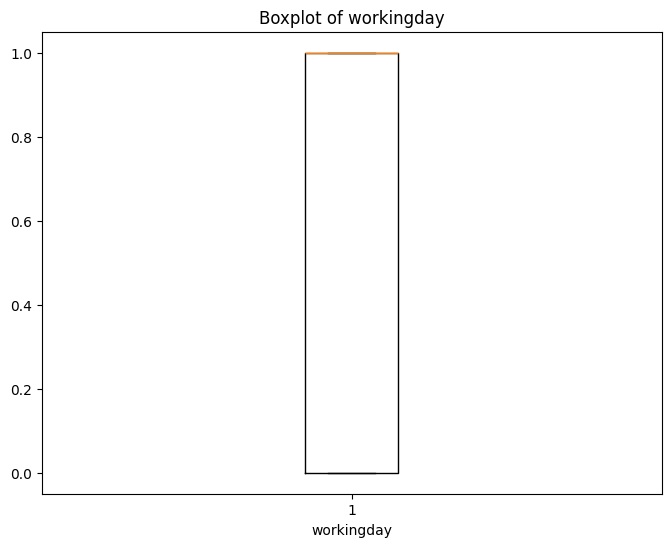

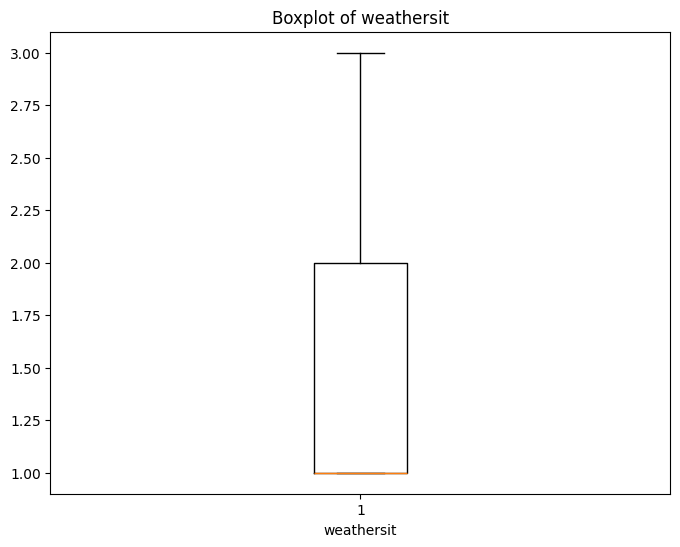

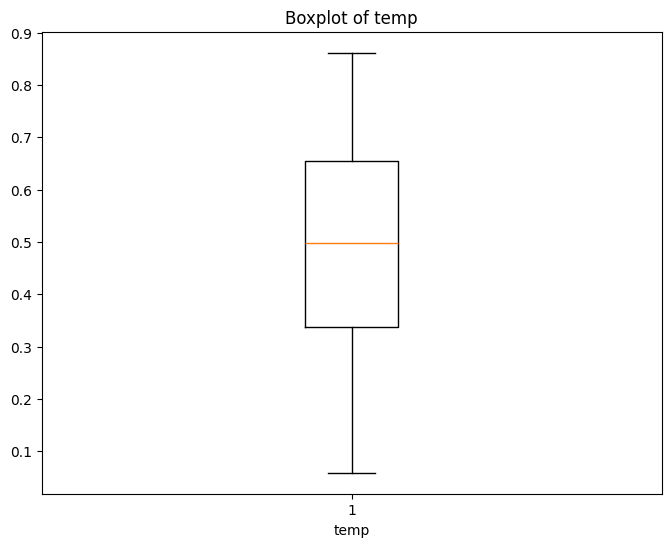

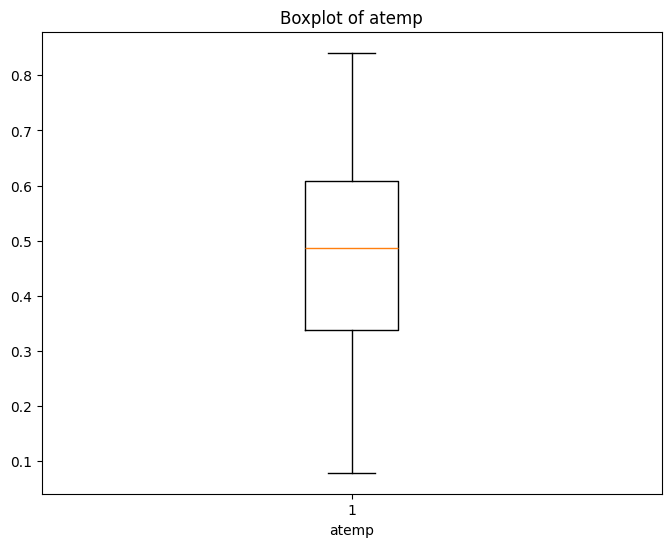

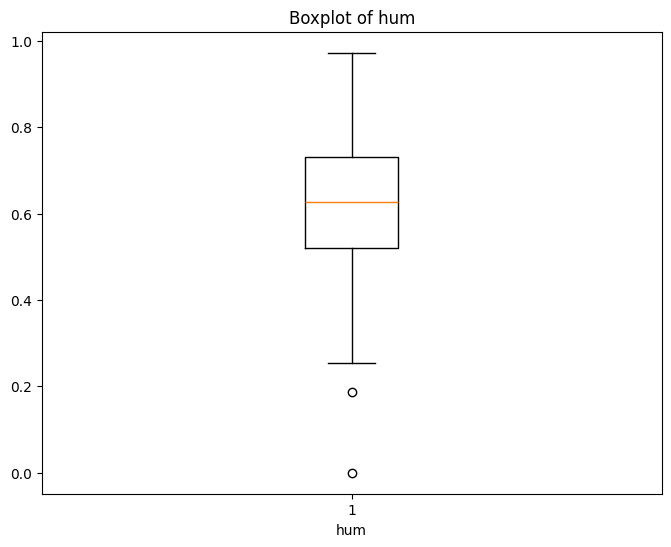

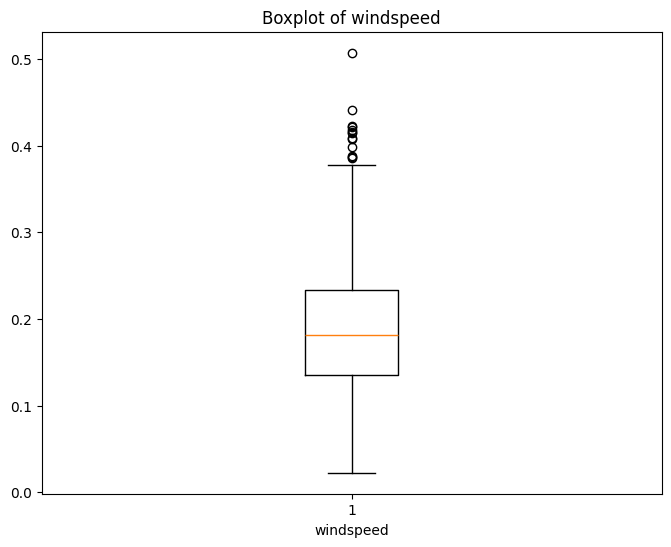

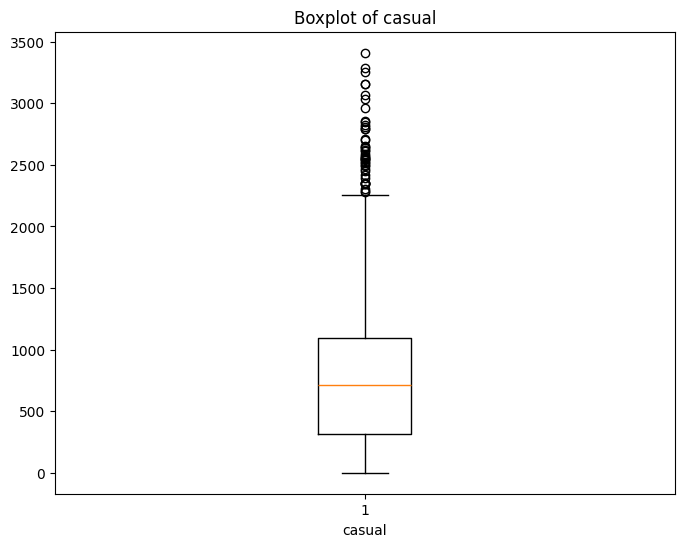

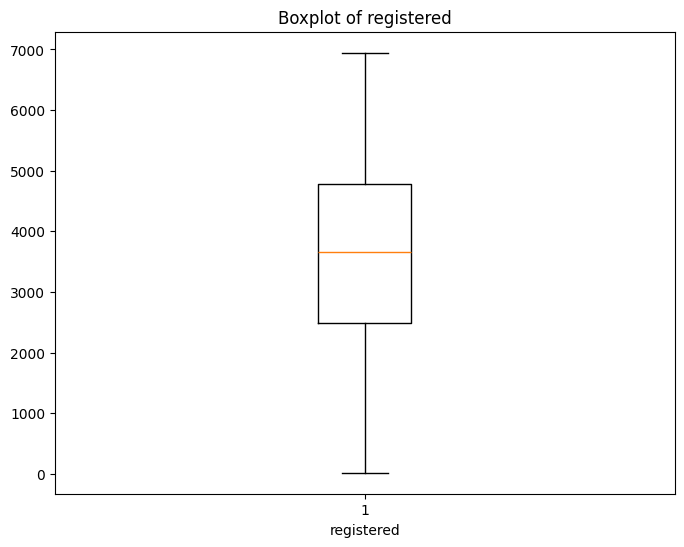

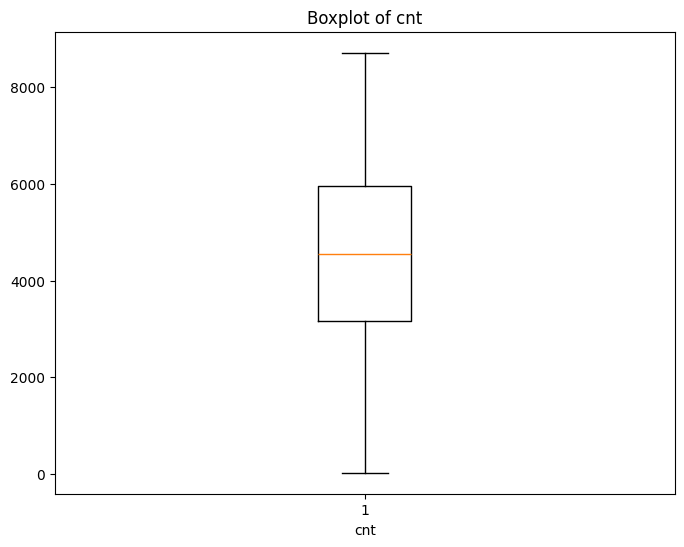

In [ ]:
# Select only numerical columns for boxplotting
num_cols = df.select_dtypes(include=np.number).columns

for column in num_cols:
    plt.figure(figsize=(8, 6))
    plt.boxplot(df[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.show()

In [ ]:
# Remove outliers using IQR method
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

df_no_outliers = df[~((df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

print(f"Original DataFrame shape: {df.shape}")
print(f"DataFrame shape after outlier removal: {df_no_outliers.shape}")

Original DataFrame shape: (731, 16)
DataFrame shape after outlier removal: (655, 16)


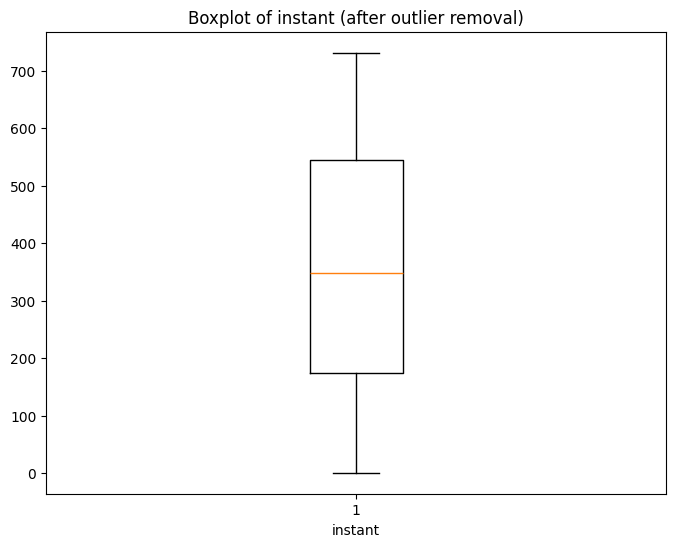

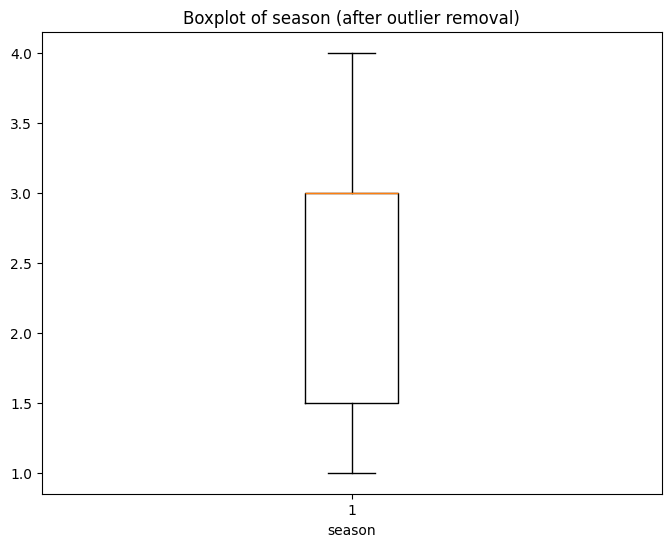

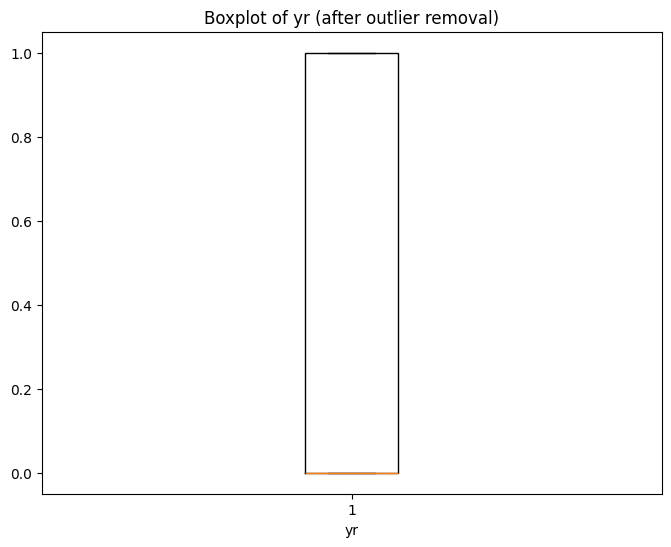

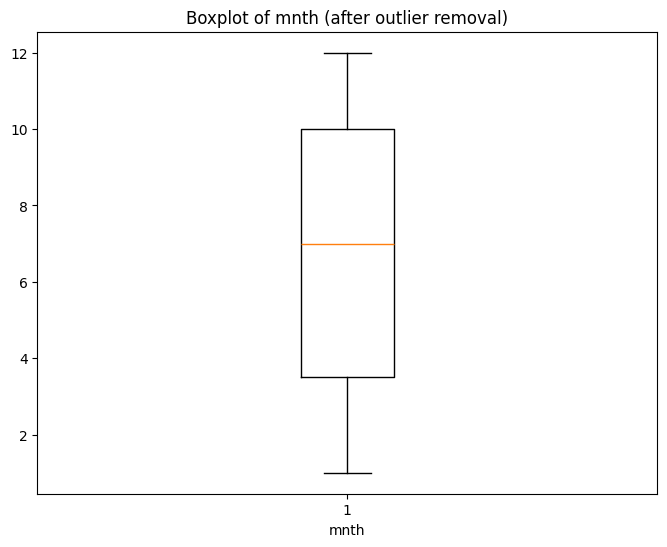

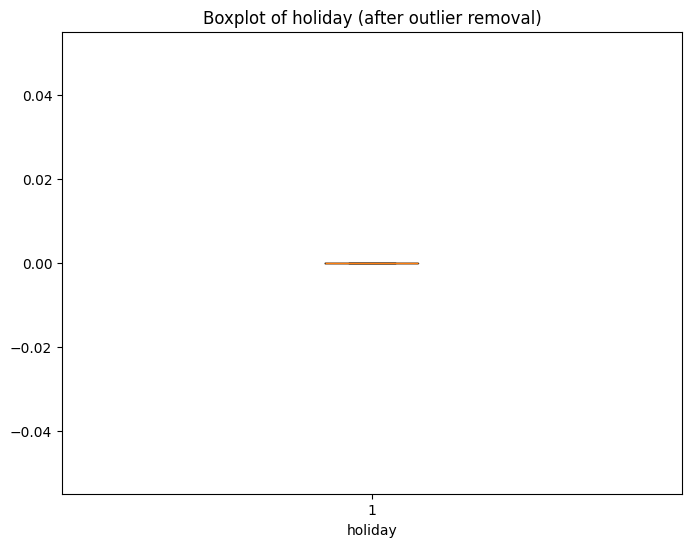

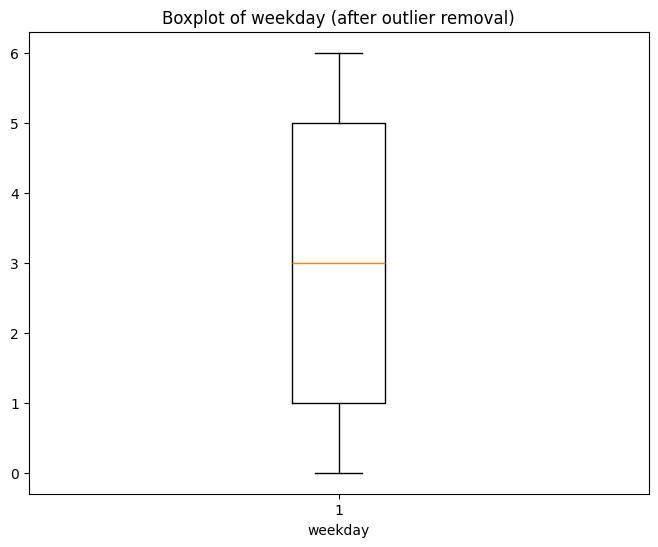

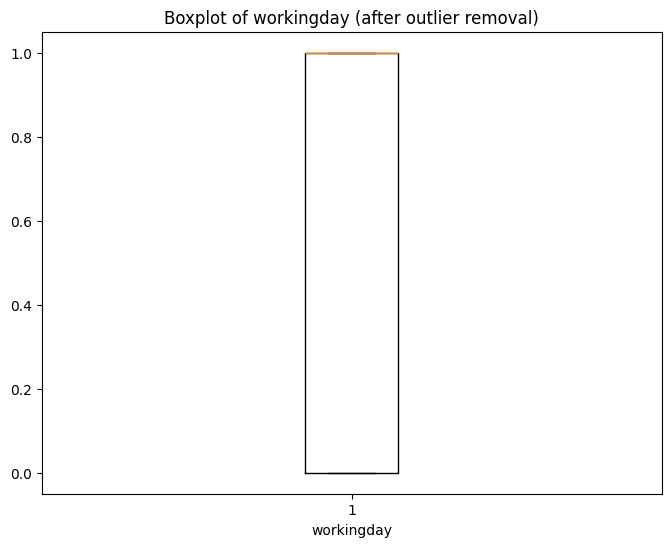

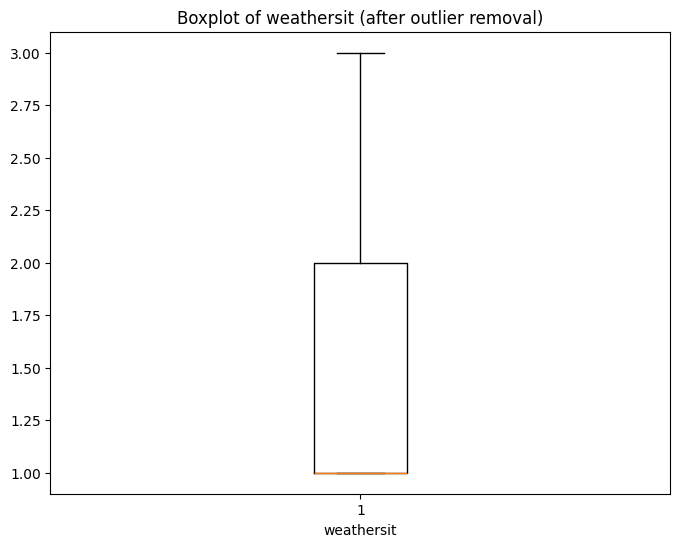

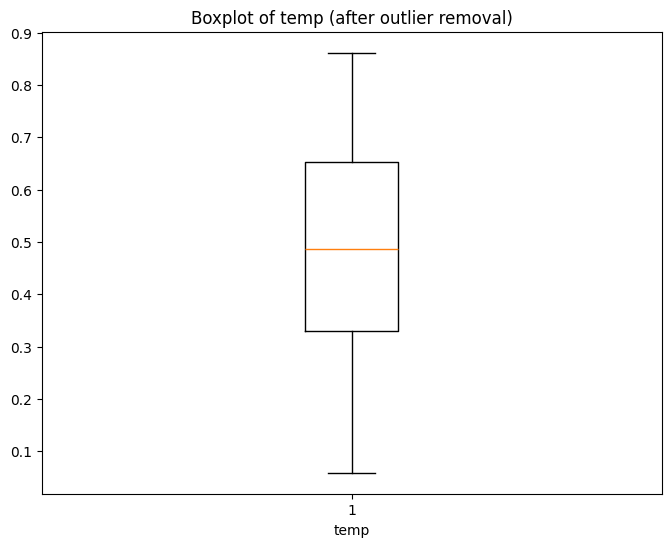

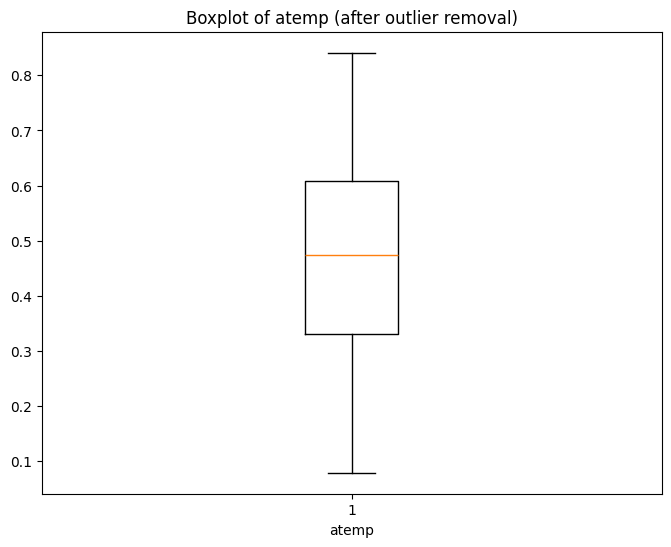

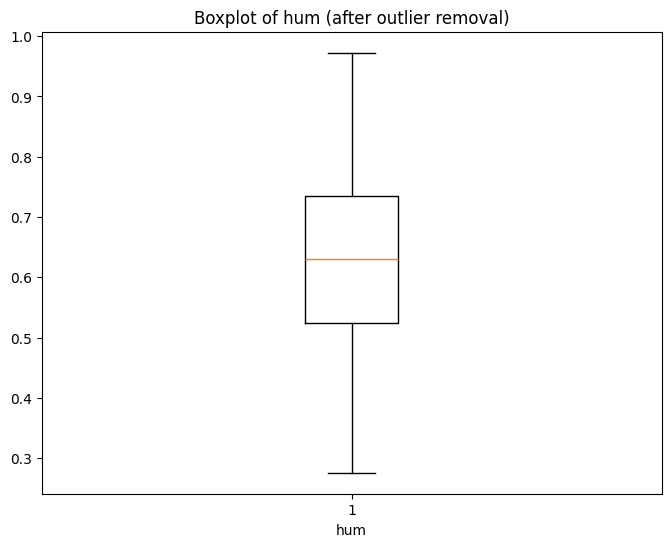

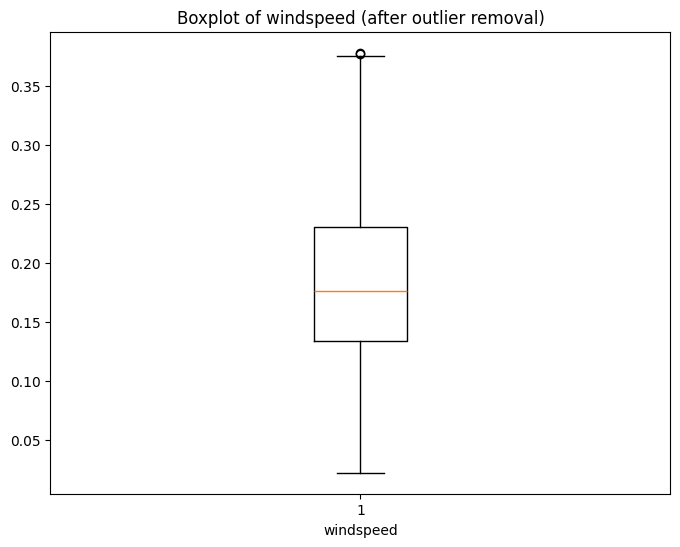

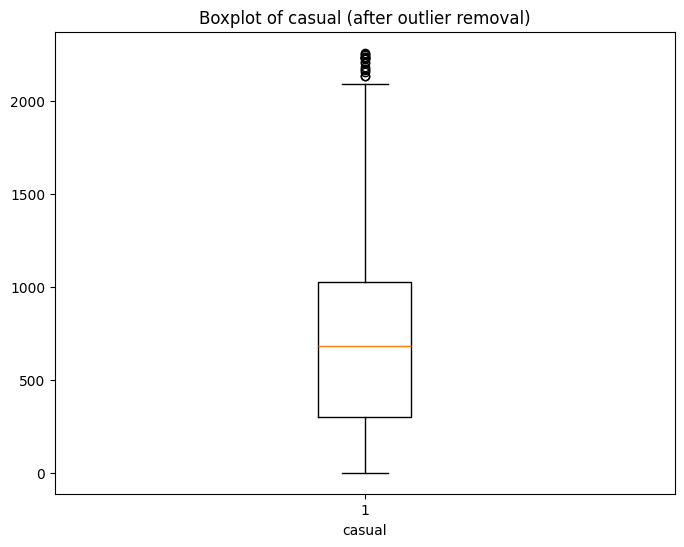

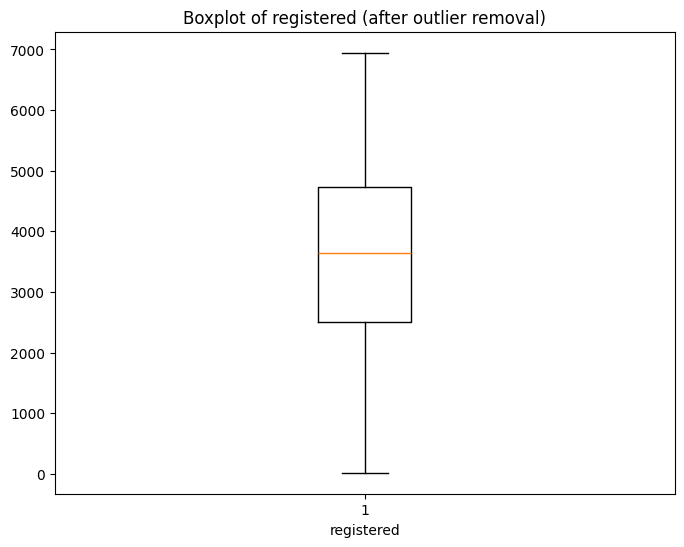

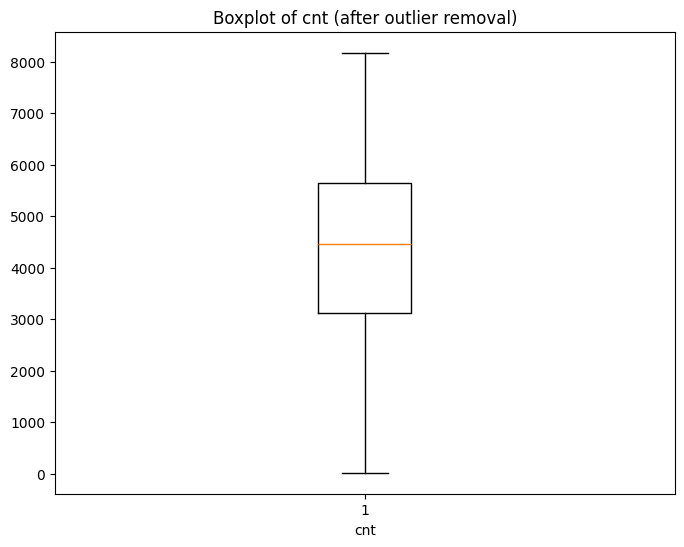

In [ ]:
num_cols_no_outliers = df_no_outliers.select_dtypes(include='number').columns

for column in num_cols_no_outliers:
    plt.figure(figsize=(8, 6))
    plt.boxplot(df_no_outliers[column])
    plt.title(f'Boxplot of {column} (after outlier removal)')
    plt.xlabel(column)
    plt.show()

In [10]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

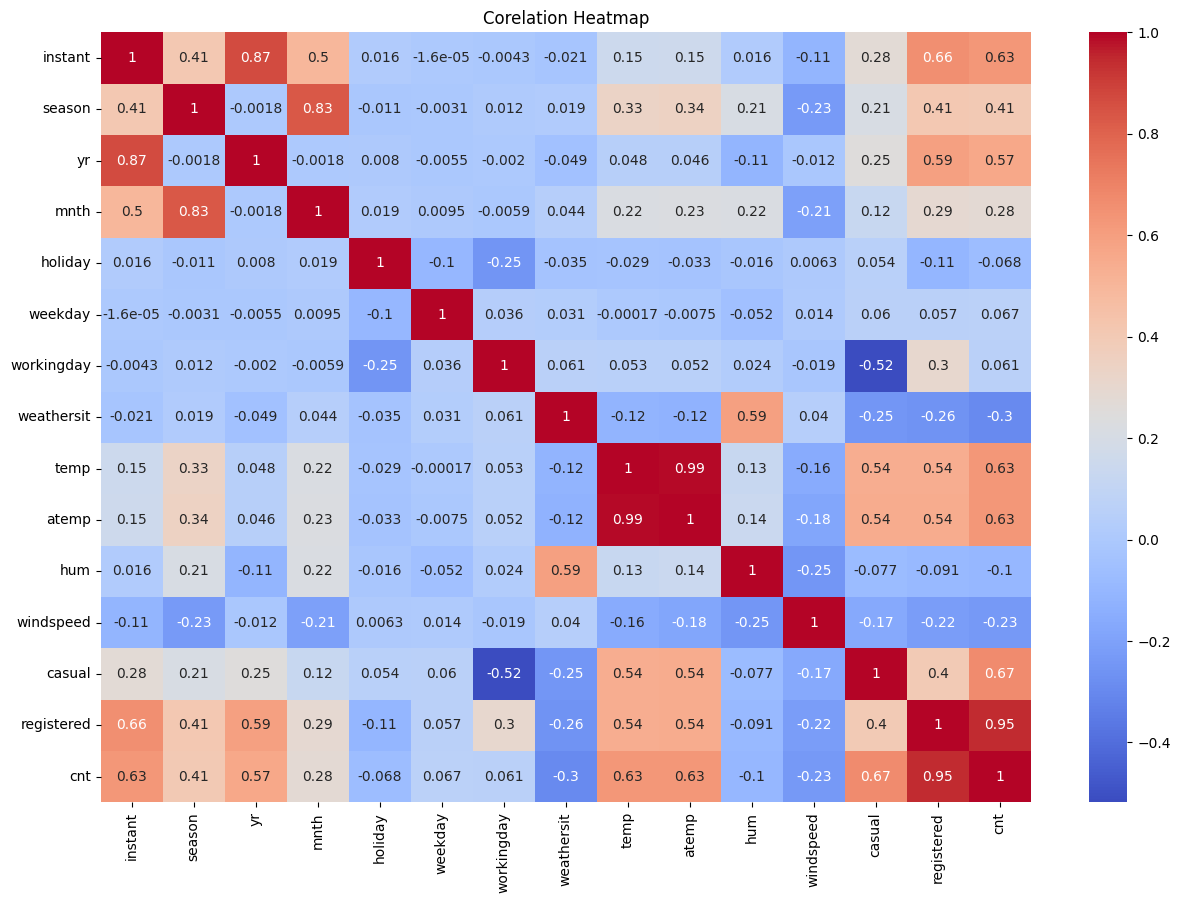

In [11]:
corelation = df.drop('dteday', axis=1).corr()
plt.figure(figsize=(15,10))
sns.heatmap(corelation,annot=True,cmap='coolwarm')
plt.title('Corelation Heatmap')
plt.show()

## Correlation Heatmap Analysis

The heatmap shows the correlation between all numerical features in the dataset.

### Key Observations:
- **cnt (total rentals)** has:
  - Strong positive correlation with **temp (0.63)** and **atemp (0.63)** → Warmer weather increases rentals.
  - Very strong correlation with **casual (0.67)** and **registered (0.95)** → Makes sense since cnt = casual + registered.
  - Slight negative correlation with **windspeed (-0.23)** → Strong winds reduce rentals.
  - Weak negative correlation with **weathersit (-0.3)** → Bad weather conditions decrease rentals.

- **temp vs atemp**: Very strong correlation (**0.99**) because they represent actual vs. “feels-like” temperature.

- **yr (0.57 correlation with cnt)**: Rentals increased over the years, suggesting growing popularity of the service.

- **holiday** and **weekday**: Very weak correlation with cnt, meaning rentals are not strongly affected by holidays or weekdays.

### Insights:
- **Weather and temperature are the biggest drivers of bike rentals.**
- **Yearly trend shows consistent growth** in bike-sharing usage.
- **Windspeed and bad weather reduce rentals**, but not as strongly as temperature increases them.


In [13]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import *

In [14]:
y = df["cnt"]
X = df.drop(["instant", "dteday", "casual", "registered", "cnt"], axis=1)

# Convert categorical columns into dummies (one-hot encoding)
X_processed = pd.get_dummies(X, drop_first=True)


In [16]:
x_train, x_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)


In [19]:

x_train_sc=StandardScaler().fit_transform(x_train)
x_test_sc=StandardScaler().fit_transform(x_test)

<div style="font-family:Arial, sans-serif; line-height:1.5; border:1px solid #ddd; border-radius:10px; padding:15px; max-width:650px;">

  <h2 style="margin-top:0; font-size:20px;">Why Use Linear Regression for Bike Rental Prediction?</h2>

  <ul>
    <li><strong>Continuous Target:</strong> The goal is to predict <em>count of rentals (cnt)</em>, which is a continuous numeric value – perfect for regression.</li>
    <li><strong>Linear Relationships:</strong> Features like <em>temperature, humidity, season, year</em> show linear correlation with rental counts.</li>
    <li><strong>Simplicity & Interpretability:</strong> It clearly shows how each factor (like temp ↑ → rentals ↑) affects demand.</li>
    <li><strong>Good Baseline:</strong> Before using complex models (Random Forest, XGBoost, etc.), Linear Regression gives a quick and interpretable baseline.</li>
  </ul>

  <p><em>Therefore, Linear Regression is a suitable first-choice model for this problem.</em></p>
</div>


In [20]:
model=LinearRegression()
model.fit(x_train_sc,y_train)

LinearRegression()

In [21]:
y_pred=model.predict(x_test_sc)

In [23]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("\nLinear Regression Results:")
print("Mean Squared Error (MSE): ", mse)
print("R-squared (R2): ", r2)


Linear Regression Results:
Mean Squared Error (MSE):  770749.9789507351
R-squared (R2):  0.807787380406368


<div style="font-family:Arial, sans-serif; line-height:1.6; border:1px solid #ccc; border-radius:10px; padding:15px; max-width:650px;">

  <h2 style="margin-top:0; font-size:20px;">Why Linear Regression is Suitable Here?</h2>

  <ul>
    <li><strong>Target Variable:</strong> We are predicting <em>rental counts</em>, a continuous variable – ideal for regression.</li>
    <li><strong>Good Performance:</strong> Model achieved <strong>R² ≈ 0.81</strong>, meaning it explains about 81% of demand variation.</li>
    <li><strong>Interpretability:</strong> Helps us see how features (temperature, humidity, season, etc.) directly influence rentals.</li>
    <li><strong>Baseline Model:</strong> Provides a solid starting point before trying complex models.</li>
  </ul>

  <p><em>Thus, Linear Regression is an effective and interpretable choice for this dataset.</em></p>
</div>


<div style="font-family:Arial, sans-serif; line-height:1.6; border:1px solid #ccc; border-radius:10px; padding:15px; max-width:650px;">

  <h2 style="margin-top:0; font-size:20px;">Why Use Random Forest for Bike Rental Prediction?</h2>

  <ul>
    <li><strong>Handles Non-linearity:</strong> Unlike Linear Regression, Random Forest captures complex non-linear relationships (e.g., sudden demand spikes on weekends/holidays).</li>
    <li><strong>Feature Interactions:</strong> It automatically models interactions between features (temperature × humidity × season).</li>
    <li><strong>Higher Accuracy:</strong> Often gives better R² and lower error compared to simple linear models.</li>
    <li><strong>Robustness:</strong> Less sensitive to outliers and overfitting due to averaging across many trees.</li>
  </ul>

  <p><em>Thus, Random Forest is chosen to improve prediction accuracy and capture complex patterns missed by Linear Regression.</em></p>
</div>


In [24]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=200, random_state=42)
rf_model.fit(x_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

In [25]:
y_pred_rf = rf_model.predict(x_test)

In [26]:
print("\nRandom Forest Results:")
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("R2:", r2_score(y_test, y_pred_rf))


Random Forest Results:
MSE: 451872.39661088446
R2: 0.8873103088593371


<div style="font-family:Arial, sans-serif; line-height:1.6; border:1px solid #ccc; border-radius:10px; padding:15px; max-width:700px;">

  <h2 style="margin-top:0; font-size:20px;">Model Comparison: Linear Regression vs Random Forest</h2>

  <table border="1" cellpadding="10" cellspacing="0" style="border-collapse:collapse; text-align:center; width:100%;">
    <tr style="background:#f2f2f2;">
      <th>Model</th>
      <th>Mean Squared Error (MSE)</th>
      <th>R² Score</th>
    </tr>
    <tr>
      <td><b>Linear Regression</b></td>
      <td>770,749.98</td>
      <td>0.8078</td>
    </tr>
    <tr>
      <td><b>Random Forest</b></td>
      <td>451,872.39</td>
      <td>0.8873</td>
    </tr>
  </table>

  <h3 style="margin-top:20px;">Why Random Forest Performs Better?</h3>
  <ul>
    <li><b>Lower Error:</b> MSE dropped significantly (770k → 451k).</li>
    <li><b>Better Fit:</b> R² improved from <b>0.81</b> to <b>0.89</b>.</li>
    <li><b>Captures Complexity:</b> Handles non-linear relationships and feature interactions.</li>
    <li><b>More Robust:</b> Less affected by outliers compared to Linear Regression.</li>
  </ul>

  <p><em>Thus, Random Forest is the preferred model for this dataset as it provides higher accuracy and better generalization.</em></p>
</div>


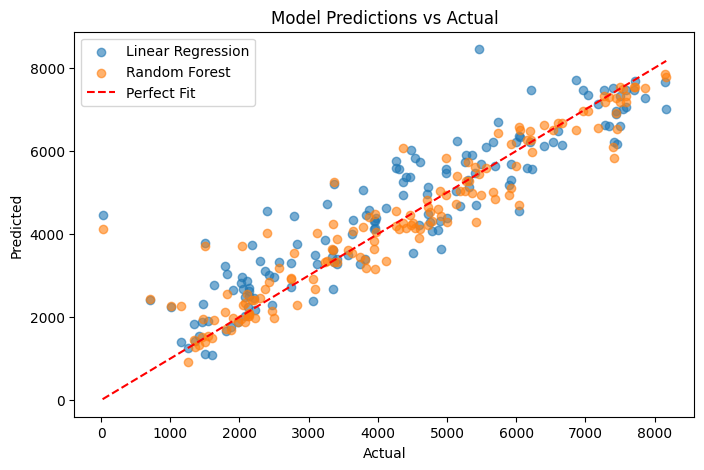

In [28]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, alpha=0.6, label="Linear Regression")
plt.scatter(y_test, y_pred_rf, alpha=0.6, label="Random Forest")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", label="Perfect Fit")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.legend()
plt.title("Model Predictions vs Actual")
plt.show()

<div style="border:2px solid #4CAF50; border-radius:10px; padding:15px; background-color:#f9fff9;">
  <h3 style="color:#2e7d32;"> Final Statement</h3>
  <p>
    Both models follow the overall trend, but
    <b style="color:#e67e22;">Random Forest predictions (orange)</b>
    are more tightly clustered around the red <i>“Perfect Fit”</i> line compared to
    <b style="color:#1976d2;">Linear Regression (blue)</b>.
  </p>
  <p>
    This matches the evaluation metrics, where Random Forest achieved
    <b>lower MSE (451k vs 770k)</b> and
    <b>higher R² (0.89 vs 0.81)</b>.
  </p>
  <p>
     Therefore, <b style="color:#2e7d32;">Random Forest is the better choice</b> for this dataset,
    as it captures non-linear patterns and provides more accurate and robust predictions.
  </p>
</div>
